In [1]:
!ollama

Usage:
  ollama [flags]
  ollama [command]

Available Commands:
  serve       Start ollama
  create      Create a model from a Modelfile
  show        Show information for a model
  run         Run a model
  pull        Pull a model from a registry
  push        Push a model to a registry
  list        List models
  cp          Copy a model
  rm          Remove a model
  help        Help about any command

Flags:
  -h, --help      help for ollama
  -v, --version   Show version information

Use "ollama [command] --help" for more information about a command.


In [2]:
!ollama list

NAME                  	ID          	SIZE  	MODIFIED    
gemma:2b              	b50d6c999e59	1.7 GB	3 weeks ago	
orca-mini:latest      	2dbd9f439647	2.0 GB	3 weeks ago	
phi:latest            	e2fd6321a5fe	1.6 GB	3 weeks ago	
stablelm-zephyr:latest	0a108dbd846e	1.6 GB	10 days ago	
tinyllama:latest      	2644915ede35	637 MB	10 days ago	


In [1]:
import requests
import json

In [2]:
check_url = 'http://localhost:11434'
if requests.get(check_url).status_code == 200:
    print('ollama is working')

ollama is working


# Importing Dataset - Conv_Questions

In [1]:
from datasets import load_dataset
dataset = load_dataset("conv_questions")

C:\Users\neerz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 2240/2240 [00:00<00:00, 427017.59 examples/s]


In [3]:
test = dataset['test']

In [24]:
import random
test = []
test = random.sample(list(dataset['test']), 100)
inputs = []
ref = []
for i in range(len(test)):
    inputs.append(test[i]['questions'])
    ref.append(test[i]['answer_texts'])
with open('ref.txt', 'w') as f:
    for line in ref:
        f.write(f"{line}\n")

with open('ref.txt', 'r') as input_file:
    # Read the content
    content = input_file.read()

# Replace commas with new lines
content = content.replace('], [', ']\n[')

# Open the output file
with open('ref.txt', 'w') as output_file:
    # Write the modified content
    output_file.write(content)

In [26]:
print(inputs)

[['In which nation was Son Heung-min born?', 'When was he born?', "What's his club team?", 'What league is Tottenham in?', 'Has he ever played in the German league?'], ['What is the country of origin of the Los Angeles Galaxy?', 'When was the club founded?', 'Who is the current head coach?', 'What league are they in?', 'Name of owner?'], ['What was the first year Twilight Zone was on air?', 'What was the first episode?', 'Did Rod Serling write the majority of the episodes?', 'Who narrated the show?', 'Which other show did he create?'], ["What's the episode with Sneed's Feed & Seed in The Simpsons?", 'What season was E-I-E-I-(Annoyed Grunt)?', 'Who wrote E-I-E-I-(Annoyed Grunt)?', 'When did E-I-E-I-(Annoyed Grunt) first air?', 'What episode aired before E-I-E-I-(Annoyed Grunt)?'], ['What year was the movie Grease released?', 'Which actor played Danny?', 'Which actress played Sandy?', 'Who is the director?', 'What is the name of the second moive?'], ['What is the name Tupac Shakur was bo

In [28]:
print(ref)

[['South Korea', '8 July 1992', 'Tottenham Hotspur F.C.', 'Premier League', 'yes'], ['United States of America', '1995', 'Guillermo Barros Schelotto', 'Major League Soccer', 'Philip Anschutz'], ['1959', 'Where Is Everybody?', 'Yes', 'Rod Serling', 'Night Gallery'], ['E-I-E-I-(Annoyed Grunt)', '11', 'Ian Maxtone-Graham', '7 November 1999', 'Treehouse of Horror X'], ['13 June 1978', 'John Travolta', 'Olivia Newton-John', 'Randal Kleiser', 'Grease 2'], ['Lesane Parish Crooks', 'East Harlem', 'drive-by shooting', 'Afeni Shakur', '13 September 1996'], ["Monty Python's Flying Circus", '45', '4', 'Ian MacNaughton', 'B-And-B'], ['Showtime', '2007', 'Michael C. Hall', '8', 'Miami'], ['Jared Leto', '1998', 'Progressive rock', 'Universal Music Group', '2018'], ['1943', 'Port Arthur', '2005', 'Pearl', 'Pacific Ocean'], ['Lesane Parish Crooks', 'East Harlem', 'drive-by shooting', 'Afeni Shakur', '13 September 1996'], ['5 July 1989', 'Seinfeld was on NBC.', 'Seinfeld was set in New York City.', 'Mic

# Scores for lone LLMs

In [ ]:
# model1 - gemma:2b
f = open('input.json', 'r')
data = json.load(f)
data['model'] = "gemma:2b"
f.close()
with open('input.json', 'w') as json_file:
    json.dump(data, json_file)


outputs_gemma = []

url = 'http://localhost:11434/api/generate'

for input in inputs:
    op = []
    for _ in input:
        f = open('input.json', 'r')
        data = json.load(f)
        data['prompt'] = _
        response = requests.post(url, json=data)
        assert response.status_code == 200
        dictionary = json.loads(response.text)
        op.append(dictionary['response'])
        f.close()
    print('row ok')
    outputs_gemma.append(op)

# writing outputs to one file
with open('op_gemma.txt', 'w') as f:
    for line in outputs_gemma:
        f.write(f"{line}\n")

In [10]:
# model2 - orca-mini
f = open('input.json', 'r')
data = json.load(f)
data['model'] = "orca-mini"
f.close()
with open('input.json', 'w') as json_file:
    json.dump(data, json_file)


outputs_orca = []

url = 'http://localhost:11434/api/generate'

for input in inputs:
    op = []
    for _ in input:
        f = open('input.json', 'r')
        data = json.load(f)
        data['prompt'] = _
        response = requests.post(url, json=data)
        assert response.status_code == 200
        dictionary = json.loads(response.text)
        op.append(dictionary['response'])
        f.close()
    print('row ok')
    outputs_orca.append(op)

# writing outputs to one file
with open('op_orca.txt', 'w') as f:
    for line in outputs_orca:
        f.write(f"{line}\n")

In [15]:
# model3 - tinyllama
f = open('input.json', 'r')
data = json.load(f)
data['model'] = "tinyllama"
f.close()
with open('input.json', 'w') as json_file:
    json.dump(data, json_file)


outputs_tinyllama = []

url = 'http://localhost:11434/api/generate'

for input in inputs:
    op = []
    for _ in input:
        f = open('input.json', 'r')
        data = json.load(f)
        data['prompt'] = _
        response = requests.post(url, json=data)
        assert response.status_code == 200
        dictionary = json.loads(response.text)
        op.append(dictionary['response'])
        f.close()
    print('row ok')
    outputs_tinyllama.append(op)

# writing outputs to one file
with open('op_tinyllama.txt', 'w') as f:
    for line in outputs_tinyllama:
        f.write(f"{line}\n")

In [1]:
from bert_score import score
import torch

In [3]:
with open("ref.txt", "r", encoding="cp1252") as file:
    reference_sentences = file.readlines()

with open("op.txt", "r", encoding="cp1252") as file:
    candidate_sentences = file.readlines()

P, R, F1 = score(candidate_sentences, reference_sentences,
                 lang="en", verbose=True)

# Take the average of the scores
avg_Precision = P.mean().item()
avg_Recall = R.mean().item()
avg_F1 = F1.mean().item()

# Compute the single BERT score
single_score = (avg_Precision + avg_Recall + avg_F1) / 3

print("Single BERT Score:", single_score)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 381.71 seconds, 0.26 sentences/sec
Single BERT Score: 0.7802601456642151


In [5]:
import matplotlib.pyplot as plt
import numpy as np

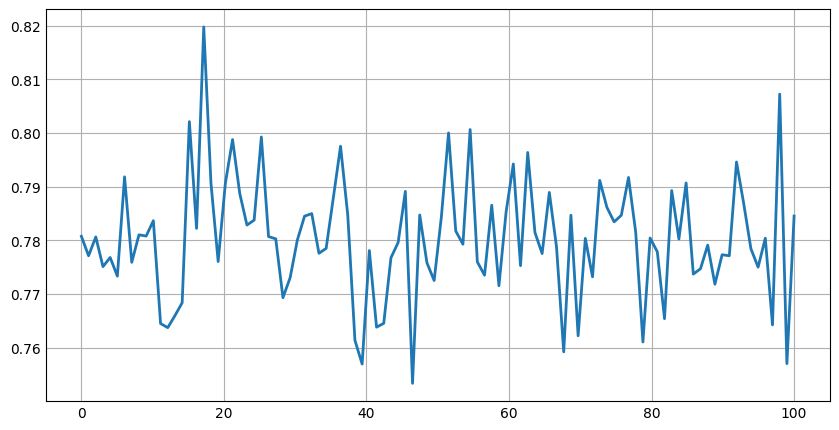

In [7]:

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, len(candidate_sentences), len(candidate_sentences))
y = (P+R+F1)/3

# plot
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2.0)

plt.show()

In [ ]:
# bleurt score


In [2]:
import llm_blender

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\neerz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [1]:
import torch

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\neerz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [2]:
import sys
sys.path

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib',
 'C:\\Users\\neerz\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0',
 '',
 'C:\\Users\\neerz\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages',
 'C:\\Users\\neerz\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32',
 'C:\\Users\\neerz\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32\\lib',
 'C:\\Users\\neerz\\AppData\\Local\\Packages\\PythonSoftwareFounda

In [1]:
from llm_blender.blender.blender_utils import get_topk_candidates_from_ranks

C:\Users\neerz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from datasets import load_dataset
dataset = load_dataset("AtlasUnified/atlas-converse")

In [4]:
!git clone https://huggingface.co/datasets/AtlasUnified/atlas-converse

Cloning into 'atlas-converse'...


In [5]:
import json
with open('atlas-converse\combined-convo.json', 'r') as f:
    data = json.load(f)

In [28]:
a = data[:2]

In [30]:
a

[{'id': '1',
  'conversations': [{'from': 'user', 'value': 'What is applied anthropology?'},
   {'from': 'AI',
    'value': 'Applied anthropology refers to the practical application of anthropological theories and methods to solve contemporary social problems. It involves working with communities to understand and address issues such as poverty, health, education, and inequality.'},
   {'from': 'user', 'value': 'Can you give me an example?'},
   {'from': 'AI',
    'value': "Sure. An applied anthropologist might work with a community to improve access to healthcare services. They would use anthropological research methods to understand the cultural beliefs and practices that influence people's healthcare decisions, and then develop interventions that take those factors into account."},
   {'from': 'user',
    'value': 'How is applied anthropology different from traditional anthropology?'},
   {'from': 'AI',
    'value': 'Traditional anthropology is focused on the study of human cultures

In [25]:
# data[id]['conversations']
len(data[1]['conversations'])

9

In [27]:
for i in range(len(data[4]['conversations'])):
    if i+1>=len(data[4]['conversations']) or data[4]['conversations'][i]['from'] == 'AI':
        continue
    print(data[4]['conversations'][i]['value'])

What is Classical Archaeology?
What are some examples of Classical Archaeology?
What methods do archaeologists use in Classical Archaeology?
How does Classical Archaeology differ from other forms of Archaeology?
Why is Classical Archaeology important?


In [32]:
data[4]['conversations'][i]['value']

'Thank you for the information.'

In [ ]:

url = 'http://127.0.0.1:11434/api/chat'
f = open('input_chat.json', 'r')
data = json.load(f)
data['model'] = 'mistral'
data['prompt'] = 'What\'s the capital of India?'
response = requests.post(url, json=data)
assert response.status_code == 200
dictionary = json.loads(response.text)

In [16]:
import pathlib 
import shutil

home_dir = pathlib.Path.home()
dataset_dir = home_dir / ".cache" / "huggingface" / "datasets"
    
shutil.rmtree(str(dataset_dir))

In [23]:
from bleurt import score

checkpoint = "C:/Users/neerz/BLEURT-20/"
references = ['Applied anthropology is the application of anthropological knowledge, methods, and theories to real-world problems and issues. It involves using anthropological approaches to understand and address social, cultural, economic, and environmental challenges in various settings such as public health, education, business, and government.', 'One example of applied anthropology in action is in the field of public health. Anthropologists may conduct ethnographic research to understand the cultural practices, beliefs, and values that influence health behaviors in a particular community. This research can then be used to design culturally-sensitive interventions and communication strategies to address specific health issues.', 'Applied anthropology is different from traditional anthropology in several ways. First, it focuses on the practical application of anthropological knowledge to solve real-world problems. Traditional anthropology, on the other hand, is primarily concerned with the study of human cultures and societies from a theoretical perspective. Applied anthropology, on the other hand, focuses on the practical application of anthropological knowledge to solve specific problems in the real world. Additionally, applied anthropology often employs more quantitative methods, such as surveys and interviews, to gather data and make recommendations.', 'Yes, there are ethical considerations in applied anthropology. Applied anthropologists must consider the potential impacts of their interventions and research on the people and communities they work with. They must ensure that they obtain informed consent, respect cultural and societal norms and values, and avoid exploitation or discrimination. Additionally, anthropologists must ensure that their interventions are culturally appropriate and ethically sound.', "You're welcome! Applied anthropology is a subfield of anthropology that focuses on using anthropological methods and theories to address real-world issues and solve practical problems. It can be applied to a variety of fields such as healthcare, education, and business, among others."]
candidates = ['Applied anthropology refers to the practical application of anthropological theories and methods to solve contemporary social problems. It involves working with communities to understand and address issues such as poverty, health, education, and inequality.', "Sure. An applied anthropologist might work with a community to improve access to healthcare services. They would use anthropological research methods to understand the cultural beliefs and practices that influence people's healthcare decisions, and then develop interventions that take those factors into account.", 'Traditional anthropology is focused on the study of human cultures and societies, past and present, without necessarily seeking to solve specific contemporary problems. Applied anthropology, on the other hand, is more focused on using anthropological knowledge to address specific social issues.', 'Yes, ethical considerations are very important in applied anthropology. Because anthropologists are working with communities, they need to be aware of issues of power and representation. They also need to ensure that their work is culturally sensitive and does not harm the communities they are working with.', "You're welcome. Let me know if you have any other questions."]

In [24]:
scorer = score.BleurtScorer(checkpoint)
scores = scorer.score(references=references, candidates=candidates)
assert isinstance(scores, list)
print(np.average(scores))

INFO:tensorflow:Reading checkpoint C:/Users/neerz/BLEURT-20/.


INFO:tensorflow:Reading checkpoint C:/Users/neerz/BLEURT-20/.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint BLEURT-20


INFO:tensorflow:Will load checkpoint BLEURT-20


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:BLEURT-20


INFO:tensorflow:... name:BLEURT-20


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... vocab_file:None


INFO:tensorflow:... vocab_file:None


INFO:tensorflow:... do_lower_case:None


INFO:tensorflow:... do_lower_case:None


INFO:tensorflow:... sp_model:sent_piece


INFO:tensorflow:... sp_model:sent_piece


INFO:tensorflow:... dynamic_seq_length:True


INFO:tensorflow:... dynamic_seq_length:True


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Creating SentencePiece tokenizer.


INFO:tensorflow:Will load model: C:/Users/neerz/BLEURT-20/sent_piece.model.


INFO:tensorflow:Will load model: C:/Users/neerz/BLEURT-20/sent_piece.model.


INFO:tensorflow:SentencePiece tokenizer created.


INFO:tensorflow:SentencePiece tokenizer created.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


0.5740199565887452


In [14]:
scores

[0.6901140809059143,
 0.5488781332969666,
 0.6045728325843811,
 0.5746968388557434,
 0.4518378973007202]

In [1]:
import ast
def file_to_matrix(filename):
    liStr = []
    with open(filename, "r", encoding="cp1252", errors="ignore") as file:
        while True:
            line = file.readline()
            if not line:
                break
        # Process the line
        liStr.append(line)
    li = []
    for _ in liStr:
        li.append(ast.literal_eval(_))
    return li

In [37]:
def bleurt_scorer_atlas_converse(scorer, ans, dataset):
    scores = []
    for i in range(len(ans)):
        # reference = []
        # for j in range(len(dataset[i]['conversations'])):
        #     if j+1>=len(dataset[i]['conversations']) or dataset[i]['conversations'][j]['from'] == 'AI':
        #         continue
        #     reference.append(dataset[i]['conversations'][j+1]['value'])
        # print(reference)
        s = scorer.score(references = dataset[i], candidates=ans[i])
        assert isinstance(s, list)
        scores.append(np.average(s))
    return scores

In [31]:
ans = [["Applied anthropology is a subfield of anthropology that focuses on using the knowledge, methods, and theories of anthropology to address real-world issues and practical problems. Instead of conducting research for the sake of academic discovery, applied anthropologists work to apply their findings to improve people's lives, resolve conflicts, develop policies, and promote cultural understanding.", 'One example of applied anthropology in action is in the field of public health. Anthropologists with a background in applied anthropology may conduct research to understand the cultural practices and beliefs related to health issues in a particular community. This knowledge can be used to develop culturally-sensitive interventions to improve health outcomes and reduce health disparities.', "Applied anthropology, also known as practical anthropology, is different from traditional anthropology in that it focuses on using anthropological knowledge and methods to address real-world problems and improve people's lives. Traditional anthropology, on the other hand, is more focused on the study of human societies and cultures for academic purposes. Applied anthropology, on the other hand, focuses on using anthropological knowledge and methods to address real-world problems and improve people's lives.", 'Yes, there are ethical considerations in applied anthropology. Applied anthropologists must consider the potential impact of their interventions on the people and communities they work with, and must ensure that their interventions are culturally appropriate and respectful. Additionally, anthropologists must ensure that their research and interventions are conducted in a way that respects the autonomy and dignity of the people they work with.', "You're welcome! Applied anthropology is a subfield of anthropology that focuses on using anthropological knowledge and methods to address real-world issues and improve people's lives. It involves working directly with communities, organizations, and governments to provide insights, recommendations, and solutions based on an understanding of cultural and social dynamics."], ['Archaeological science, also known as archaeoscience, is the application of scientific methods and techniques to the study of the past, particularly in the fields of archaeology, anthropology, and cultural heritage preservation. Archaeological scientists use a combination of fieldwork, laboratory analysis, and theoretical approaches to understand human cultures, societies, and environments from prehistoric times to the present.', 'Archaeologists analyze a wide range of materials to gain insights into past cultures and societies. Some common types of materials include artifacts, human remains, animal bones, plant remains, and environmental samples.', 'There are a variety of scientific techniques used in various fields such as biology, chemistry, physics, and archaeology. Some common techniques include DNA analysis, radiocarbon dating, X-ray diffraction, and spectroscopy.', 'These techniques help us understand the past by providing information about the age, composition, and structure of various materials and artifacts. For example, archaeologists can use techniques like radiocarbon dating to determine the age of artifacts, which can help them reconstruct historical events and timelines. X-ray diffraction, for example, can be used to study the structure of minerals and rocks, which can help us understand the composition and age of ancient artifacts. Similarly, DNA analysis can be used to study ancient human remains, which can help us understand their ancestry and migration']]
dataset = [['Applied anthropology refers to the practical application of anthropological theories and methods to solve contemporary social problems. It involves working with communities to understand and address issues such as poverty, health, education, and inequality.', "Sure. An applied anthropologist might work with a community to improve access to healthcare services. They would use anthropological research methods to understand the cultural beliefs and practices that influence people's healthcare decisions, and then develop interventions that take those factors into account.", 'Traditional anthropology is focused on the study of human cultures and societies, past and present, without necessarily seeking to solve specific contemporary problems. Applied anthropology, on the other hand, is more focused on using anthropological knowledge to address specific social issues.', 'Yes, ethical considerations are very important in applied anthropology. Because anthropologists are working with communities, they need to be aware of issues of power and representation. They also need to ensure that their work is culturally sensitive and does not harm the communities they are working with.', "You're welcome. Let me know if you have any other questions."], ["Archaeological science is the application of scientific techniques to the analysis of archaeological materials.", "Archaeologists analyze a wide range of materials including bones, ceramics, metals, and plant remains.", "Some of the techniques used include radiocarbon dating, DNA analysis, and isotope analysis.", "These techniques can help us determine the age of artifacts, reconstruct past environments, and even provide insights into past human behavior."]]

In [36]:
ans[0]

["Applied anthropology is a subfield of anthropology that focuses on using the knowledge, methods, and theories of anthropology to address real-world issues and practical problems. Instead of conducting research for the sake of academic discovery, applied anthropologists work to apply their findings to improve people's lives, resolve conflicts, develop policies, and promote cultural understanding.",
 'One example of applied anthropology in action is in the field of public health. Anthropologists with a background in applied anthropology may conduct research to understand the cultural practices and beliefs related to health issues in a particular community. This knowledge can be used to develop culturally-sensitive interventions to improve health outcomes and reduce health disparities.',
 "Applied anthropology, also known as practical anthropology, is different from traditional anthropology in that it focuses on using anthropological knowledge and methods to address real-world problems 

In [38]:
s = bleurt_scorer_atlas_converse(scorer, ans, dataset)

In [2]:
import json

In [3]:
with open('atlas-converse\combined-convo.json', 'r') as f:
    dataset_atlas = json.load(f)
f.close()

In [9]:
with open('atlas-converse\combined-convo_3.json', 'r') as f:
    dataset_atlas.extend(json.load(f))
f.close()

In [10]:
len(dataset_atlas)

4718

In [1]:
li = [0.9, 0.4, 0.5, 0.6]
filename = 'Experiment_Results\\test.txt'
with open(filename, 'w') as f:
    for line in li:
        f.write(f"{line}\n")
f.close() 

In [ ]:
!ollama pull gemma:2b


In [5]:
import json
def dataset_init_atlas_converse():
    dataset_atlas = []
    with open('atlas-converse\combined-convo.json', 'r') as f:
        li = json.load(f)
    f.close()
    dataset_atlas.extend(li[:167])
    with open('atlas-converse\combined-convo_2.json', 'r') as f:
        li = json.load(f)
    f.close()
    dataset_atlas.extend(li[:167])
    with open('atlas-converse\combined-convo_3.json', 'r') as f:
        li = json.load(f)
    f.close()
    dataset_atlas.extend(li[:167])

    return dataset_atlas

In [6]:
li = dataset_init_atlas_converse()

In [7]:
len(li)

501

In [8]:
filename = "Experiment_Results/test.txt"
fa = []
fused_answers = []
for i in range(50):
    fa.append(i)
    if i%5==0:
        with open(filename, 'a') as f:
            for line in fa:
                f.write(f"{line}\n")
        f.close()
        fused_answers.extend(fa)
        fa = []

In [1]:
import ast
def file_to_matrix(filename):
    liStr = []
    with open(filename, "r", encoding="cp1252", errors="ignore") as file:
        while True:
            line = file.readline()
            if not line:
                break
        # Process the line
        liStr.append(line)
    li = []
    for _ in liStr:
        li.append(ast.literal_eval(_))
    return li

In [2]:
filename1 = "Experiment_Results/exp_1.txt"
li = []
with open(filename1, 'r') as file:
    lines = file.readlines()
    for line in lines:
        li.append(ast.literal_eval(line))


# Gotta redo the scores of exp 1 and 3

In [1]:
import ast
filename1 = "Experiment_Results/exp_1.txt"
li = []
with open(filename1, 'r') as file:
    lines = file.readlines()
    for line in lines:
        li.append(ast.literal_eval(line))

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset("conv_questions")
train_data = dataset['train'].select(range(2))

C:\Users\neerz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\datasets\load.py:1486: FutureWarning: The repository for conv_questions contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/conv_questions
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [5]:
train_data[0]['answer_texts'][0]

'1969'

In [ ]:
from bleurt import score
scorer = score.BleurtScorer("C:/Users/neerz/BLEURT-20/")

In [6]:
references = ['1969','(They Long to Be) Close to You','1983','anorexia nervosa','heart failure']
candidates = ['The Carpenters signed with A&M Records in 1969.', "The Carpenters' first hit was 'Meet Me in Montana', which was released in 1970.", 'Karen Carpenter, the lead vocalist of The Carpenters, died on February 4, 1983, at the age of 32, due to complications from idiopathic cardiomyopathy and emphysema.', 'Karen Carpenter had anorexia nervosa, a serious eating disorder characterized by self-imposed starvation and excessive weight loss.', 'Karen Carpenter died on February 1, 1983, due to complications from anorexia nervosa and electrolyte imbalances.']


In [ ]:
s = scorer.score(references=references, candidates=candidates)

In [7]:
from evaluate import load
bertscore = load("bertscore")

In [8]:
res = bertscore.compute(predictions = candidates, references = references, lang="en")
print(res)

C:\Users\neerz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [0.7847802639007568, 0.8113411068916321, 0.7451315522193909, 0.8458641767501831, 0.8096674680709839], 'recall': [0.8274049162864685, 0.8142207264900208, 0.8246516585350037, 0.9155497550964355, 0.8409191370010376], 'f1': [0.8055290579795837, 0.8127783536911011, 0.782877504825592, 0.8793284893035889, 0.8249974250793457], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.40.1)'}


In [11]:
import numpy as np
np.average(res['f1'])

0.8211021661758423

In [6]:
a = bertscore.compute(predictions = ['Messi is a soccer player'], references = ['Messi is a football player'], lang="en")

In [7]:
print(a)

{'precision': [0.9921432733535767], 'recall': [0.9921432733535767], 'f1': [0.9921432733535767], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.40.1)'}
